In [2]:
"""
A simplified version of an I1-FFL from Michael Elowitz's Biological Circuit Design Course:
"""
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate
sns.set_style('ticks')
%matplotlib inline

def rhs(yz, t, a, b, r):
    """
    Right hand side of system of ODEs describing I1-FFL.
    """
    x, y, z = yz
    return np.array([a*x/(1+x)-b*x, x - y, (x / y - z) / r])

# Time points we want for the solution
t = np.linspace(0, 10, 1000)

# Initial condition
xyz_0 = np.array([2.0, 2.0, 1.0])

# Parameters
Fs = [10.0, 4.0, 1.0]
b =  0.5
r = 2

# Keeping Track of the final values:
xs = []
ys = []
zs = []

for F in Fs:
    # Integrate ODES
    xyz = integrate.odeint(rhs, xyz_0, t, args=(F, b, r))

    # Pluck out y and z
    x, y, z = xyz.transpose()

    # Append the pre-fold change steady state
    x = np.insert(x, 0, 2.0)
    y = np.insert(y, 0, 2.0)
    z = np.insert(z, 0, 1.0)
    xs.append(x)
    ys.append(y)
    zs.append(z)
t = np.insert(t, 0, -1.0)

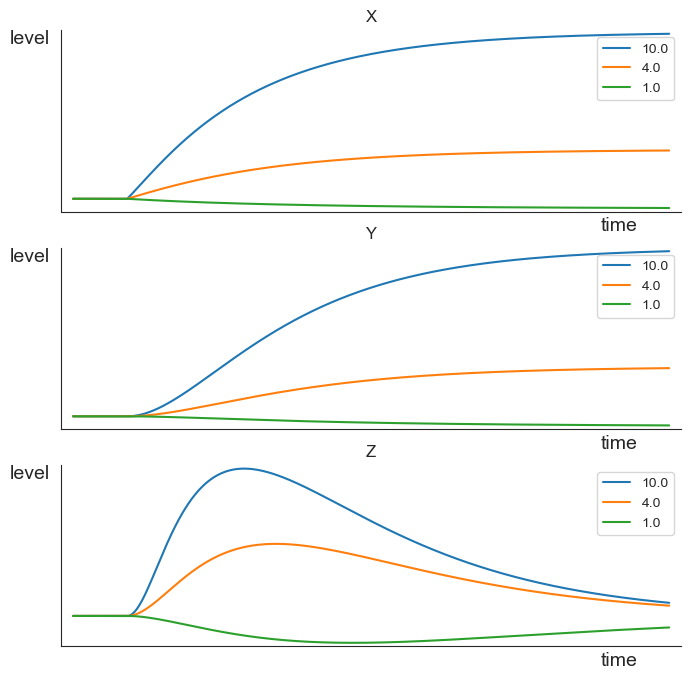

In [10]:
# Generate x
#x = 2.0 + 2.0 * (t > 0.0).astype(dtype=float)
# Plot the results
fig, ax = plt.subplots(3, 1, figsize=(8, 8))
for y in ys:
    ax[1].set_title('Y')
    ax[1].plot(t, y, '-')
for x in xs:
    ax[0].set_title('X')
    ax[0].plot(t, x, '-')
for z in zs:
    ax[2].set_title('Z')
    ax[2].plot(t, z, '-')
for i in range(ax.size):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].margins(0.02)
    ax[i].set_xlabel('time', x=.9, fontsize=14)
    ax[i].set_ylabel('level', rotation=0, fontsize=14)
    ax[i].legend(Fs)
    ax[i].yaxis.set_label_coords(-0.05, 0.9) 
sns.despine(offset=0.1)